In [53]:
import json
from collections import defaultdict
from functools import reduce
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = json.load(open('/mmdetection/data/coco_datasets/datasets/generalide/17_05_2022/annotations/new_test_generali_17_05_2022.json'))
print(len(data['images']))
print(len(data['annotations']))
print(data['categories'], end='\n\n')
print(data['annotations'][0], end='\n\n')
print(data['images'][0], end='\n\n')

4474
12467
[{'supercategory': 'Carparts', 'id': 0, 'name': 'scratch'}, {'supercategory': 'Carparts', 'id': 1, 'name': 'dent'}, {'supercategory': 'Carparts', 'id': 2, 'name': 'crack'}, {'supercategory': 'Carparts', 'id': 3, 'name': 'broken'}, {'supercategory': 'Carparts', 'id': 4, 'name': 'lamp_broken'}, {'supercategory': 'Carparts', 'id': 5, 'name': 'glass_broken'}, {'supercategory': 'Carparts', 'id': 6, 'name': 'hole'}, {'supercategory': 'Carparts', 'id': 7, 'name': 'totaled'}]

{'id': 0, 'category_id': 7, 'iscrowd': 0, 'segmentation': [[1070.6824560633022, 44.40628849048852, 974.1988179824507, 44.40628849048852, 974.1988179824507, 236.48933110493087, 1070.6824560633022, 236.48933110493087]], 'image_id': 0, 'area': 18532.870765080617, 'bbox': [974.1988179824507, 44.40628849048852, 96.4836380808515, 192.08304261444235], 'bbox_mode': 1}

{'id': 0, 'license': 4, 'coco_url': 'coco.org', 'flickr_url': 'flickr.org', 'task_name': 'nothing', 'url': 'https://generalide.motionscloud.com/rails/a

In [3]:
caseid_to_img = defaultdict(list)
img_to_anns = defaultdict(list)


for img in data['images']:
    caseid_to_img[img['case_id']].append(img)
for ann in data['annotations']:
    img_to_anns[ann['image_id']].append(ann)
    
print('number of cases: ', len(caseid_to_img.keys()))
print(len(reduce(lambda x,y: x+y, list(caseid_to_img.values()))))

print(len(img_to_anns.keys()))
#nearly 200 images don't have annotations

number of cases:  547
4474
4242


In [4]:
damage_names = [cat['name'] for cat in data['categories']]
damage_dist = {damage_name: [0]*len(data['images']) for damage_name in damage_names}
# print(damage_dist['scratch'])
# for caseid, imgs in caseid_to_img.items():
for idx, img in enumerate(data['images']):
    anns = img_to_anns[img['id']]
    for ann in anns:
        damage_dist[damage_names[ann['category_id']]][idx] += 1


In [5]:
print(damage_dist.keys())

dict_keys(['scratch', 'dent', 'crack', 'broken', 'lamp_broken', 'glass_broken', 'hole', 'totaled'])


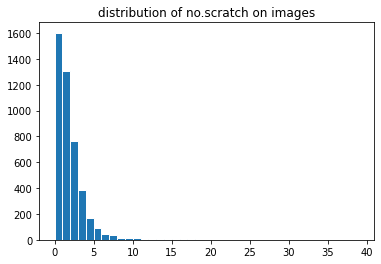

6439

In [8]:
plt.hist(damage_dist['scratch'],bins=max(damage_dist['scratch']),edgecolor='w')
plt.title('distribution of no.scratch on images')
plt.show()  
sum(damage_dist['scratch'])

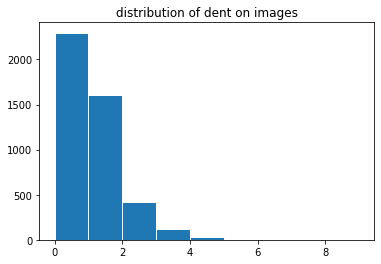

2965

In [9]:
plt.hist(damage_dist['dent'],bins=max(damage_dist['dent']),edgecolor='w')
plt.title('distribution of dent on images')
plt.show()  
sum(damage_dist['dent'])

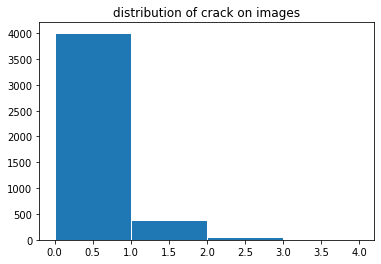

570

In [10]:
plt.hist(damage_dist['crack'],bins=max(damage_dist['crack']),edgecolor='w')
plt.title('distribution of crack on images')
plt.show()  
sum(damage_dist['crack'])

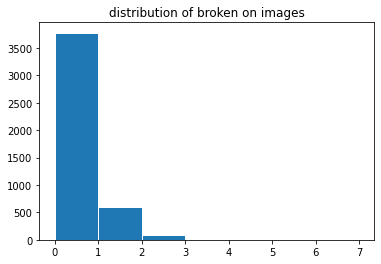

828

In [11]:
plt.hist(damage_dist['broken'],bins=max(damage_dist['broken']),edgecolor='w')
plt.title('distribution of broken on images')
plt.show()  
sum(damage_dist['broken'])

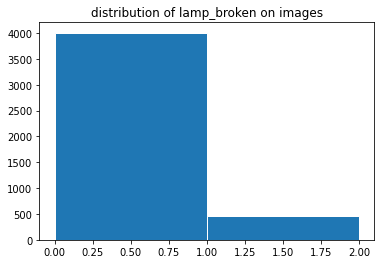

485

In [12]:
plt.hist(damage_dist['lamp_broken'],bins=max(damage_dist['lamp_broken']),edgecolor='w')
plt.title('distribution of lamp_broken on images')
plt.show()  
sum(damage_dist['lamp_broken'])

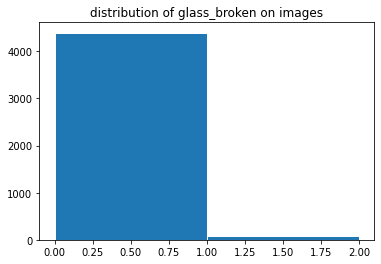

81

In [13]:
plt.hist(damage_dist['glass_broken'],bins=max(damage_dist['glass_broken']),edgecolor='w')
plt.title('distribution of glass_broken on images')
plt.show()  
sum(damage_dist['glass_broken'])

In [14]:
# plt.hist(damage_dist['hole'],bins=max(damage_dist['hole']),edgecolor='w')
# plt.title('distribution of hole on images')
# plt.show()  
sum(damage_dist['hole'])

0

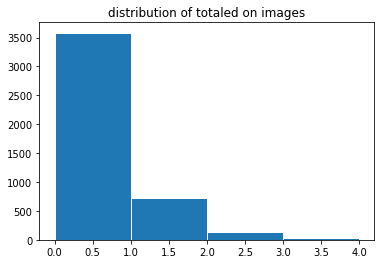

1099

In [15]:
plt.hist(damage_dist['totaled'],bins=max(damage_dist['totaled']),edgecolor='w')
plt.title('distribution of totaled on images')
plt.show()  
sum(damage_dist['totaled'])

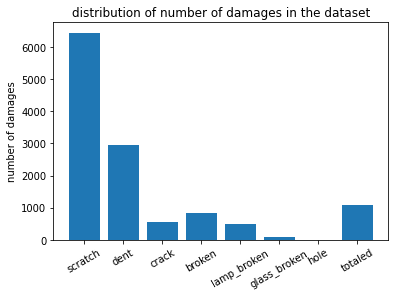

In [68]:
x = list(range(8))
y = [sum(vals) for key, vals in damage_dist.items()]
plt.bar(damage_names, y)
plt.xticks(rotation=(30))
# for i, v in enumerate(y):
#     plt.text(v + 3, i + 
#              25, str(v), color='blue', fontweight='bold')

plt.ylabel('number of damages')
plt.title('distribution of number of damages in the dataset')
plt.show()

## determine outliers

In [47]:
crack_subcat_names = ['crack', 'broken', 'lamp_broken', 'glass_broken', 'hole']
def create_img_to_damage_mapping():
    mapping_list = []
    for cls in crack_subcat_names:
        mapping_name = 'imgTo' + str(cls)
        locals()[mapping_name] = defaultdict(list)
        for ann in data['annotations']:
            if ann['category_id'] >=2 and ann['category_id'] <=6:
                
                if crack_subcat_names[ann['category_id']-2] == str(cls):
                    locals()[mapping_name][ann['image_id']].append(ann)
        mapping_list.append(locals()[mapping_name])
    return mapping_list
crack_mapping_list = create_img_to_damage_mapping()
print('number of types of crack damages', len(crack_mapping_list))

number of types of crack damages 5


In [91]:
def create_img_to_damage_mapping():
    mapping_list = []
    for cls in damage_names:
        mapping_name = 'imgTo' + str(cls)
        locals()[mapping_name] = defaultdict(list)
        for ann in data['annotations']:
            if damage_names[ann['category_id']] == str(cls):
                locals()[mapping_name][ann['image_id']].append(ann)
        mapping_list.append(locals()[mapping_name])
    return mapping_list
damage_mapping_list = create_img_to_damage_mapping()
print('number of types of damages', len(damage_mapping_list))

number of types of damages 8


In [92]:
damage_names

['scratch',
 'dent',
 'crack',
 'broken',
 'lamp_broken',
 'glass_broken',
 'hole',
 'totaled']

In [101]:
total_scratch = damage_mapping_list[damage_names.index('scratch')]
total_dent = damage_mapping_list[damage_names.index('dent')]
total_totaled = damage_mapping_list[damage_names.index('totaled')]

total_crack = damage_mapping_list[damage_names.index('crack')]
total_broken = damage_mapping_list[damage_names.index('broken')]
total_lamp_broken = damage_mapping_list[damage_names.index('lamp_broken')]
total_glass_broken = damage_mapping_list[damage_names.index('glass_broken')]
total_hole = damage_mapping_list[damage_names.index('hole')]

In [102]:
print(len(total_scratch.keys()))
print(len(total_dent.keys()))
print(len(total_totaled.keys()))


print(len(total_crack.keys()))
print(len(total_broken.keys()))
print(len(total_glass_broken.keys()))
print(len(total_lamp_broken.keys()))
print(len(total_hole.keys()))

2872
2178
891
465
698
80
469
0


In [111]:
def get_img_area(img_id, data):
    for img in data['images']:
        if img['id']==img_id:
            img_area = img['height']*img['width']
            break
    return img_area

def determine_damage_outliers(damage_dict, lower_thres, upper_thres):
    damage_img_ratio = []
    large_damage = defaultdict(list)
    tiny_damage = defaultdict(list)
    for img_id, damage_anns in damage_dict.items():
        for damage_ann in damage_anns:
            damage_area = max(damage_ann['bbox'][2] * damage_ann['bbox'][3], 1e-5)
            ratio = damage_area/get_img_area(img_id, data)
            damage_img_ratio.append(ratio)
            if ratio > upper_thres:
                large_damage[img_id].append(damage_ann)
            elif ratio < lower_thres:
                tiny_damage[img_id].append(damage_ann)
    return damage_img_ratio, large_damage, tiny_damage
def flatten_list(dict_list):
    if len(dict_list.values()) == 0:
        return []
    return reduce(lambda x,y: x+y, list(dict_list.values()))

### Crack

number of tiny crack annos: 53 "
" number of large crack annos: 4
total crack annos: 570


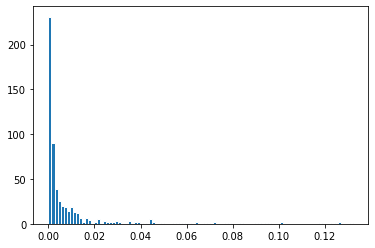

In [115]:
crack_img_ratio, large_crack, tiny_crack = determine_damage_outliers(total_crack,np.exp(-8.5), 0.2)
print('number of tiny crack annos: {} "\n" number of large crack annos: {}'.format(len(flatten_list(tiny_crack)), len(flatten_list(large_crack))))
print('total crack annos: {}'.format(len(flatten_list(total_crack))))

plt.hist([ratio for ratio in crack_img_ratio if ratio <0.2], bins=100, edgecolor='w')
plt.show()

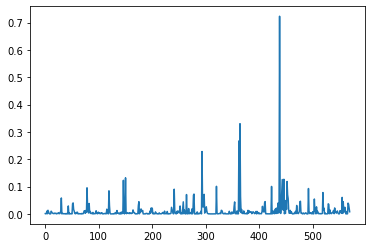

In [88]:
plt.plot(crack_img_ratio)

### Broken

number of tiny broken annos: 8 "
" number of large broken annos: 134
total broken annos: 828


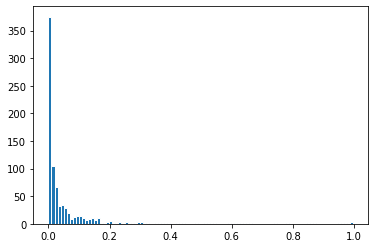

In [86]:
broken_img_ratio, large_broken, tiny_broken = determine_damage_outliers(total_broken,np.exp(-8.5), 0.1)
print('number of tiny broken annos: {} "\n" number of large broken annos: {}'.format(len(flatten_list(tiny_broken)), len(flatten_list(large_broken))))
print('total broken annos: {}'.format(len(flatten_list(total_broken))))

plt.hist([broken_img_ratio], bins=100, edgecolor='w')
plt.show()

### Lamp_broken

number of tiny lamp_broken annos: 2 "
" number of large lamp_broken annos: 99
total lamp_broken annos: 485


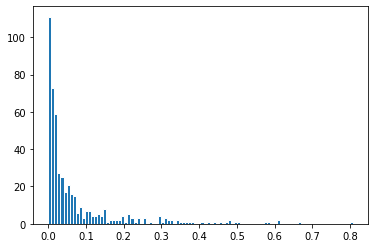

In [87]:
lamp_broken_img_ratio, large_lamp_broken, tiny_lamp_broken = determine_damage_outliers(total_lamp_broken,np.exp(-8.5), 0.1)
print('number of tiny lamp_broken annos: {} "\n" number of large lamp_broken annos: {}'.format(len(flatten_list(tiny_lamp_broken)), len(flatten_list(large_lamp_broken))))
print('total lamp_broken annos: {}'.format(len(flatten_list(total_lamp_broken))))

plt.hist(lamp_broken_img_ratio, bins=100, edgecolor='w')
plt.show()

### Scratch

number of tiny scratch annos: 536 
number of large scratch annos: 596
total scratch annos: 6439


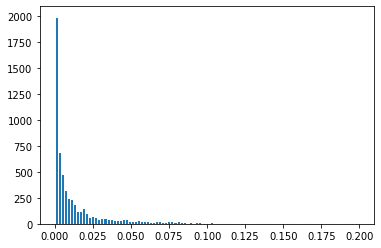

In [109]:
scratch_img_ratio, large_scratch, tiny_scratch = determine_damage_outliers(total_scratch,np.exp(-8.5), 0.1)
print('number of tiny scratch annos: {} \nnumber of large scratch annos: {}'.format(len(flatten_list(tiny_scratch)), len(flatten_list(large_scratch))))
print('total scratch annos: {}'.format(len(flatten_list(total_scratch))))

plt.hist([ratio for ratio in scratch_img_ratio if ratio<0.2], bins=100, edgecolor='w')
plt.show()

### Dent

number of tiny dent annos: 90 
number of large dent annos: 0
total dent annos: 2965


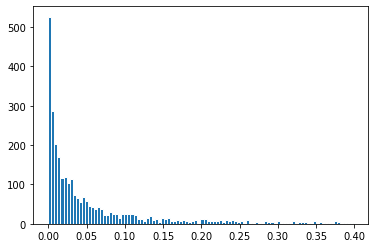

In [112]:
dent_img_ratio, large_dent, tiny_dent = determine_damage_outliers(total_dent,np.exp(-7.5), 1)
print('number of tiny dent annos: {} \nnumber of large dent annos: {}'.format(len(flatten_list(tiny_dent)), len(flatten_list(large_dent))))
print('total dent annos: {}'.format(len(flatten_list(total_dent))))

plt.hist([ratio for ratio in dent_img_ratio if ratio<0.4], bins=100, edgecolor='w')
plt.show()

### Totaled

number of tiny totaled annos: 0 
number of large totaled annos: 0
total totaled annos: 1099


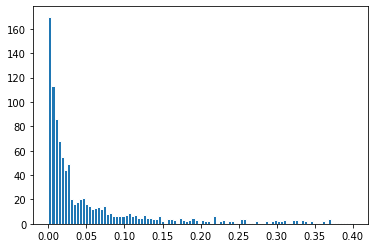

In [114]:
totaled_img_ratio, large_totaled, tiny_totaled = determine_damage_outliers(total_totaled,np.exp(-10), 1)
print('number of tiny totaled annos: {} \nnumber of large totaled annos: {}'.format(len(flatten_list(tiny_totaled)), len(flatten_list(large_totaled))))
print('total totaled annos: {}'.format(len(flatten_list(total_totaled))))

plt.hist([ratio for ratio in totaled_img_ratio if ratio<0.4], bins=100, edgecolor='w')
plt.show()